In [4]:
import rasterio

# input and output file paths
input_file = '/Users/tnmthai/Downloads/S2B_MSIL2A_20230227T222549_N0509_R029_T59GPM_20230227T234621.SAFE/GRANULE/L2A_T59GPM_A031229_20230227T222545/IMG_DATA/R10m/T59GPM_20230227T222549_B04_10m.jp2'
output_file = '/Users/tnmthai/Downloads/S2B_MSIL2A_20230227T222549_N0509_R029_T59GPM_20230227T234621.SAFE/GRANULE/L2A_T59GPM_A031229_20230227T222545/IMG_DATA/R10m/T59GPM_20230227T222549_B04_5m.jp2'

# open input file
with rasterio.open(input_file) as src:
    # resample to 5 m resolution
    data = src.read(
        out_shape=(
            src.count,
            int(src.height * src.transform[0] / 5),
            int(src.width * src.transform[0] / 5)
        ),
        resampling=rasterio.enums.Resampling.cubic
    )
    # update metadata
    transform = src.transform * src.transform.scale(
        (src.width / data.shape[-1]),
        (src.height / data.shape[-2])
    )
    profile = src.profile
    profile.update({
        'height': data.shape[1],
        'width': data.shape[2],
        'transform': transform,
        'crs': src.crs
    })
    # write output file
    with rasterio.open(output_file, 'w', **profile) as dst:
        dst.write(data)


In [13]:
import rasterio
import numpy as np
from rasterio.plot import show

# input file paths for the three bands
band1_file = '/Users/tnmthai/Downloads/S2B_MSIL2A_20230227T222549_N0509_R029_T59GPM_20230227T234621.SAFE/GRANULE/L2A_T59GPM_A031229_20230227T222545/IMG_DATA/R10m/T59GPM_20230227T222549_B04_5m.jp2'
band2_file = '/Users/tnmthai/Downloads/S2B_MSIL2A_20230227T222549_N0509_R029_T59GPM_20230227T234621.SAFE/GRANULE/L2A_T59GPM_A031229_20230227T222545/IMG_DATA/R10m/T59GPM_20230227T222549_B03_5m.jp2'
band3_file = '/Users/tnmthai/Downloads/S2B_MSIL2A_20230227T222549_N0509_R029_T59GPM_20230227T234621.SAFE/GRANULE/L2A_T59GPM_A031229_20230227T222545/IMG_DATA/R10m/T59GPM_20230227T222549_B02_5m.jp2'

# open the three input files
with rasterio.open(band1_file) as src1, rasterio.open(band2_file) as src2, rasterio.open(band3_file) as src3:
    # read the data from each band
    band_red = src1.read(1)
    band_green = src2.read(1)
    band_blue = src3.read(1)

    rgb = np.stack((band_red, band_green, band_blue), axis=-1)
    # update metadata
    profile = src.profile
    profile.update(count=3, dtype=rasterio.uint8)
    # write output file
    with rasterio.open('/Users/tnmthai/Downloads//rgb.tif', 'w', **profile) as dst:
        dst.write(rgb)
    # plot output
    show(rgb)


RasterioIOError: Dataset is closed: /Users/tnmthai/Downloads//rgb.tif

TypeError: Invalid shape (3, 10980, 10980) for image data

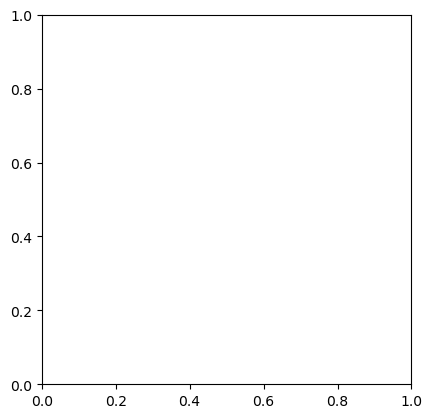

In [12]:
import rasterio
import matplotlib.pyplot as plt

# input file path
input_file = '/Users/tnmthai/Downloads//rgb.tif'

# open input file
with rasterio.open(input_file) as src:
    # read the image as a numpy array
    img = src.read()

# plot the image
plt.imshow(img)
plt.show()
